# 1.- Entendiendo el problema

#### **Descripción**

Este conjunto de datos contiene información médica relacionada con pacientes con diabetes, con el objetivo principal de predecir si un paciente tiene diabetes o no, en función de ciertas características médicas y demográficas.

#### **<u>Características:</u>**

**Pregnancies:** Número de veces que ha estado embarazada

**Glucose:** Concentración de glucosa plasmática a las 2 horas en una prueba de tolerancia a la glucosa oral.

**Blood pressure:** Presión arterial diastólica (mm Hg)

**SkinThickness:** Grosor del pliegue cutáneo del tríceps (mm)

**Insulin:** Insulina sérica de 2 horas (mu U/ml)ra en m)^2)

**BMI:** Índice de masa corporal (peso en kg/(altura en m)^2)

**DiabetesPedigreeFunction:** Función del pedigrí de la diabetes

**Edad:** Edad (años)

**Resultado:** variable de clase (0 o 1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

# 1.- Análisis exploratorio

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.rename({
    'Pregnancies':'Embarazos',
    'Glucose':'Glucosa',
    'BloodPressure':'Presión arterial',
    'SkinThickness':'Pliegue cutaneo',
    'Insulin':'Insulina sangre',
    'BMI':'Masa corporal',
    'DiabetesPedigreeFunction':'Pedigrí',
    'Age':'Edad',
    'Outcome':'Diagnóstico',
}, axis=1, inplace=True)

In [7]:
df.head()

,Embarazos,Glucosa,Presión arterial,Pliegue cutaneo,Insulina sangre,Masa corporal,Pedigrí,Edad,Diagnóstico
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Embarazos         768 non-null    int64  
 1   Glucosa           768 non-null    int64  
 2   Presión arterial  768 non-null    int64  
 3   Pliegue cutaneo   768 non-null    int64  
 4   Insulina sangre   768 non-null    int64  
 5   Masa corporal     768 non-null    float64
 6   Pedigrí           768 non-null    float64
 7   Edad              768 non-null    int64  
 8   Diagnóstico       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Embarazos,Glucosa,Presión arterial,Pliegue cutaneo,Insulina sangre,Masa corporal,Pedigrí,Edad,Diagnóstico
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Embarazos           0
Glucosa             0
Presión arterial    0
Pliegue cutaneo     0
Insulina sangre     0
Masa corporal       0
Pedigrí             0
Edad                0
Diagnóstico         0
dtype: int64

In [11]:
df.isin([np.inf, -np.inf]).sum()

Embarazos           0
Glucosa             0
Presión arterial    0
Pliegue cutaneo     0
Insulina sangre     0
Masa corporal       0
Pedigrí             0
Edad                0
Diagnóstico         0
dtype: int64

In [12]:
df.corr()['Diagnóstico'].sort_values(ascending=False)

Diagnóstico         1.000000
Glucosa             0.466581
Masa corporal       0.292695
Edad                0.238356
Embarazos           0.221898
Pedigrí             0.173844
Insulina sangre     0.130548
Pliegue cutaneo     0.074752
Presión arterial    0.065068
Name: Diagnóstico, dtype: float64

In [13]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [14]:
df.columns

Index(['Embarazos', 'Glucosa', 'Presión arterial', 'Pliegue cutaneo',
       'Insulina sangre', 'Masa corporal', 'Pedigrí', 'Edad', 'Diagnóstico'],
      dtype='object')

## Analisis univariable

In [15]:
uni_colores = ['#6385D2']

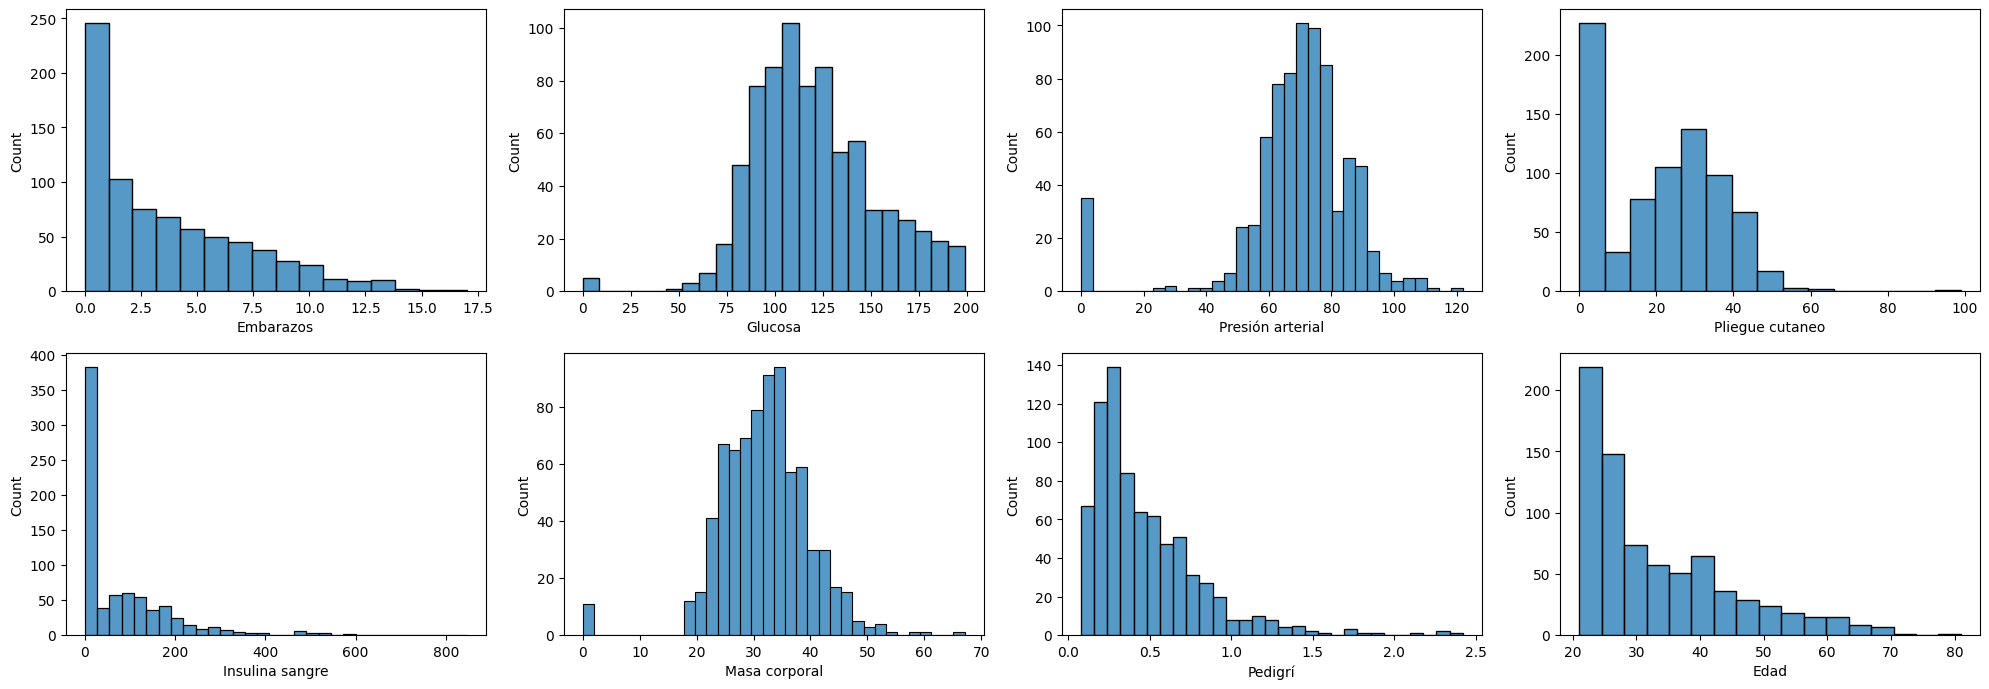

In [16]:
df_hist = ['Embarazos', 'Glucosa', 'Presión arterial', 'Pliegue cutaneo','Insulina sangre', 'Masa corporal', 'Pedigrí', 'Edad']
           
plt.figure(figsize=(20, 10), dpi=100)

for i, columna in enumerate(df_hist, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=columna)
           
    plt.tight_layout()

In [17]:
(df==0).sum()

Embarazos           111
Glucosa               5
Presión arterial     35
Pliegue cutaneo     227
Insulina sangre     374
Masa corporal        11
Pedigrí               0
Edad                  0
Diagnóstico         500
dtype: int64

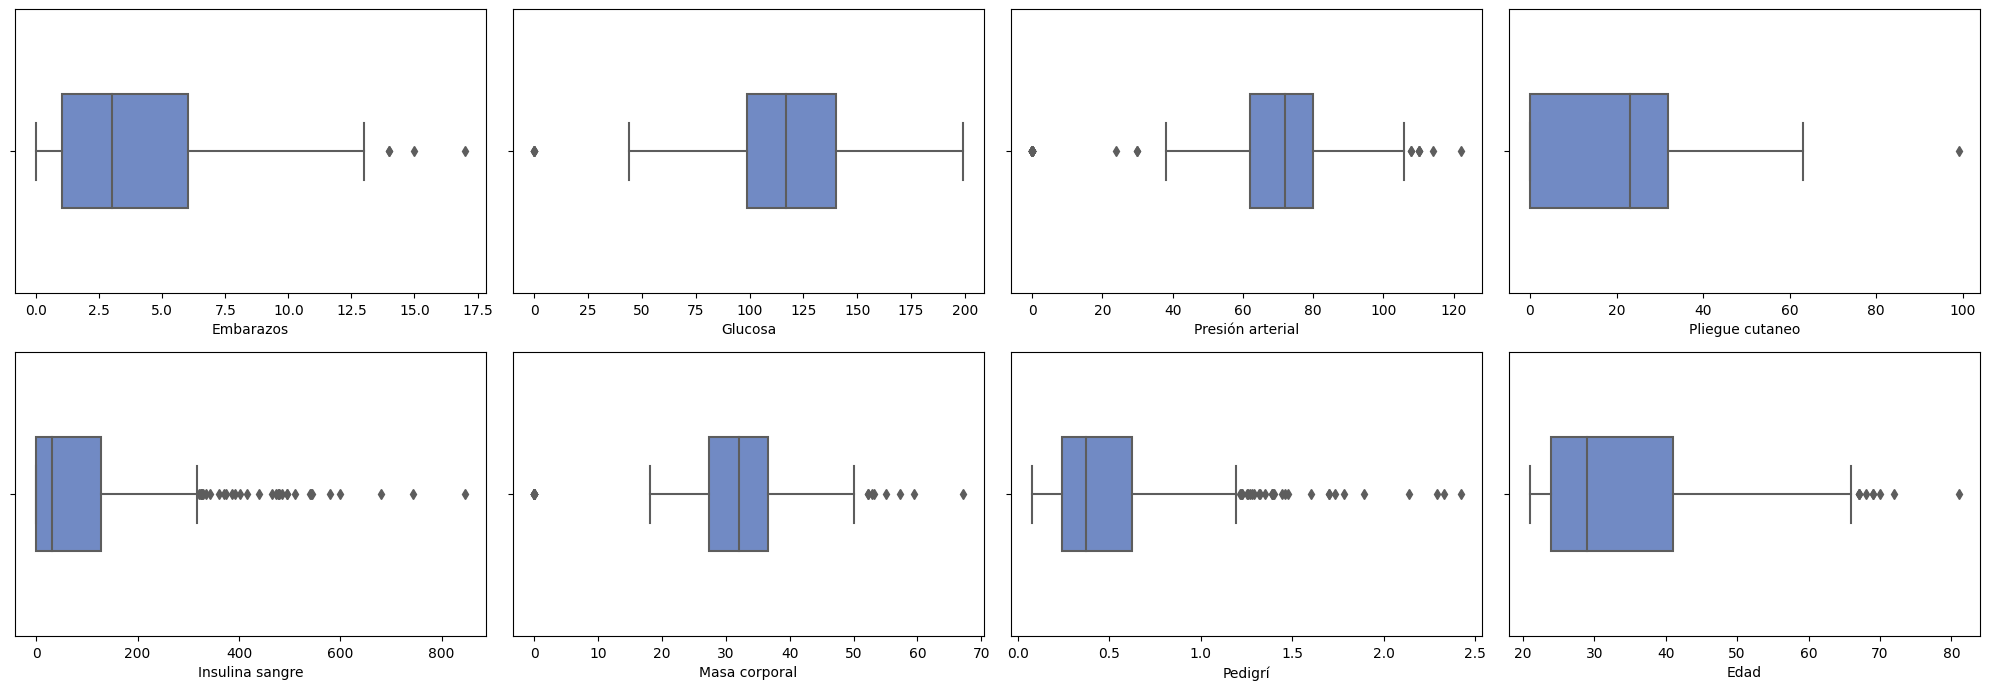

In [18]:
box_df = ['Embarazos','Glucosa', 'Presión arterial', 'Pliegue cutaneo','Insulina sangre', 'Masa corporal', 'Pedigrí', 'Edad']

plt.figure(figsize=(20, 10), dpi=100)

for i, columna in enumerate(box_df, start=1):
    plt.subplot(3, 4, i)
    
    sns.boxplot(data=df, x=columna, width=0.4, palette=uni_colores)
    
    plt.tight_layout()

## Análisis bivariable

In [19]:
bi_colores = ['#66c2a5', '#fc8d62']

<function matplotlib.pyplot.show(close=None, block=None)>

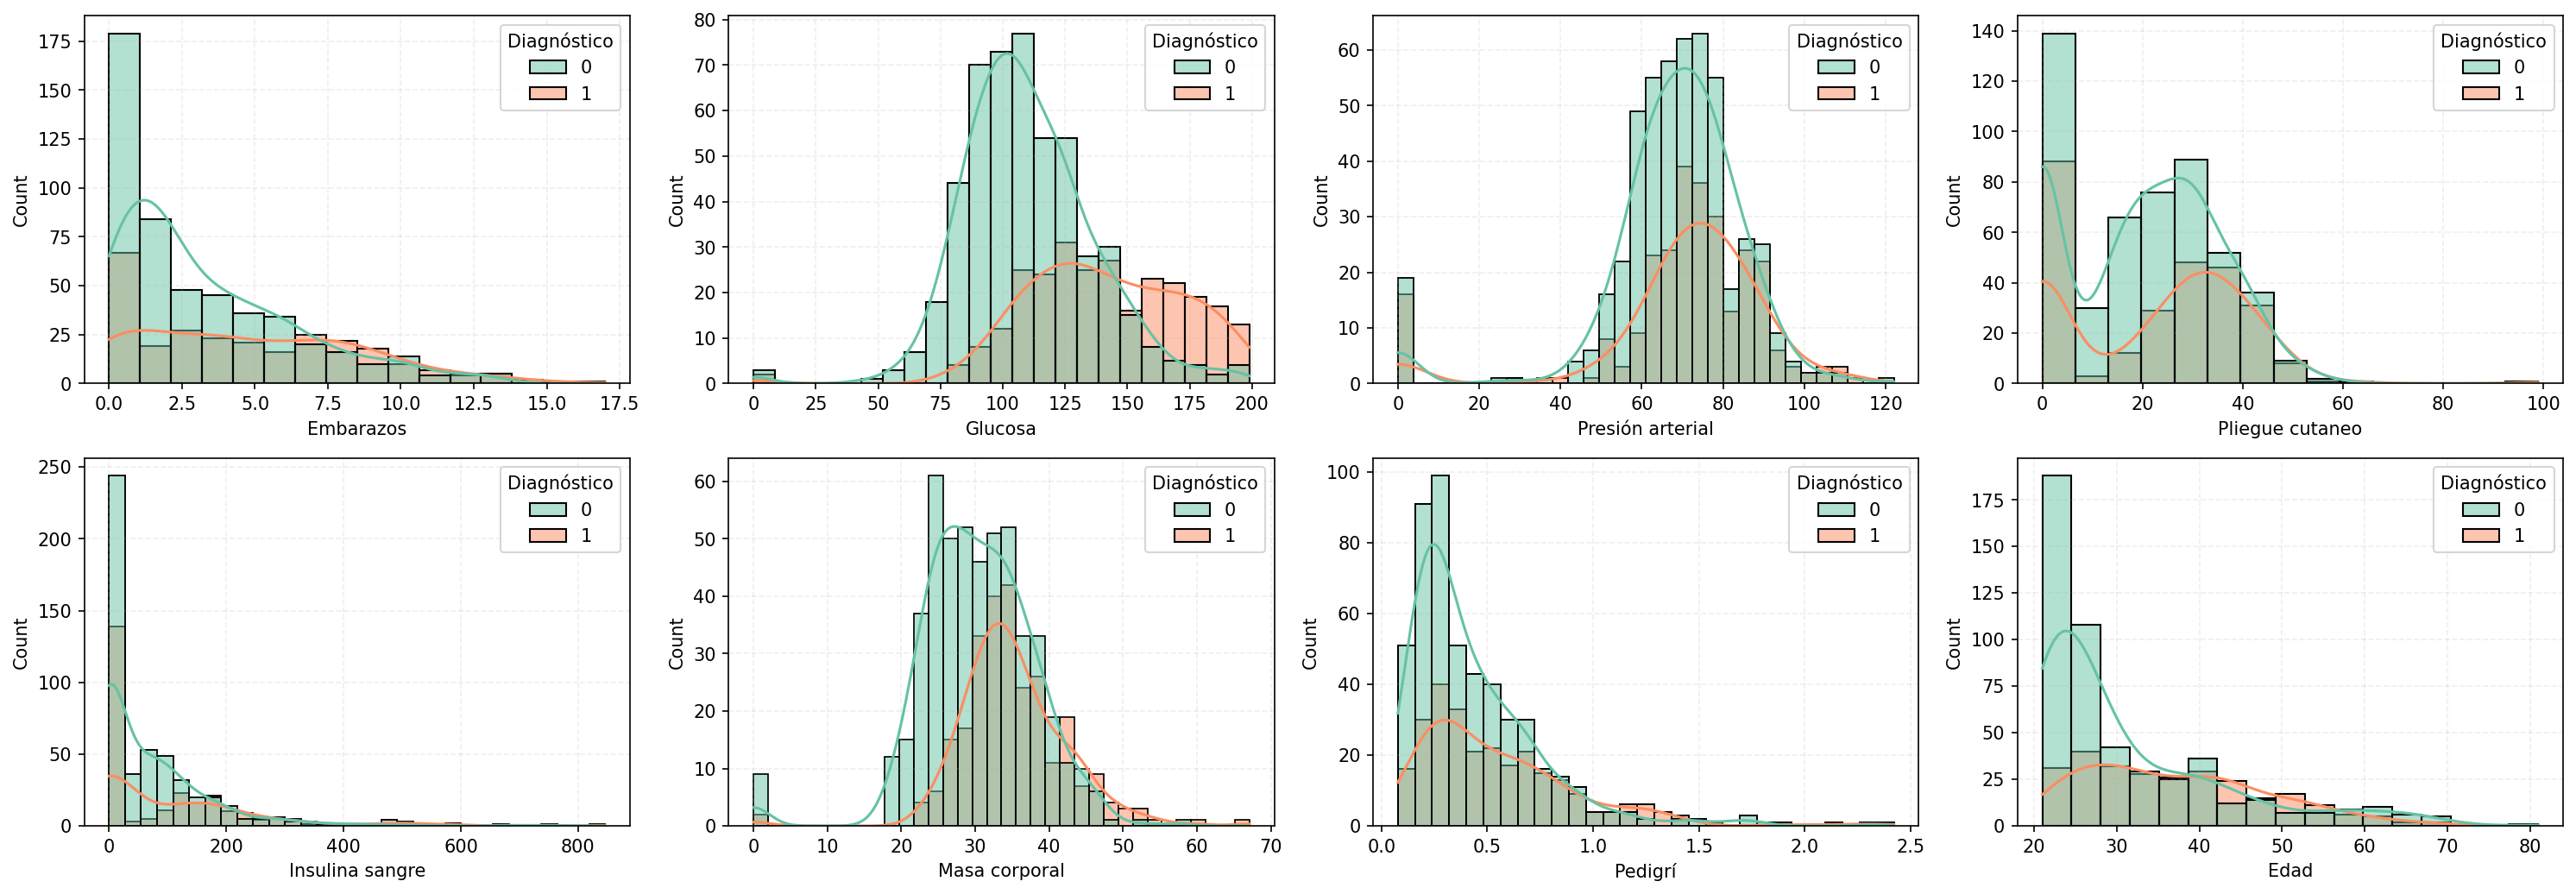

In [20]:
hist_df = ['Embarazos','Glucosa', 'Presión arterial', 'Pliegue cutaneo','Insulina sangre', 'Masa corporal', 'Pedigrí', 'Edad']

plt.figure(figsize=(20, 10), dpi=150)

for i, columna in enumerate (hist_df, start=1):
    plt.subplot(3, 4, i)
    
    sns.histplot(data=df, x=columna, hue='Diagnóstico', kde=True, palette=bi_colores)
    
    plt.grid(True, linestyle='--', alpha=0.2)
    
    plt.tight_layout()
    
plt.show

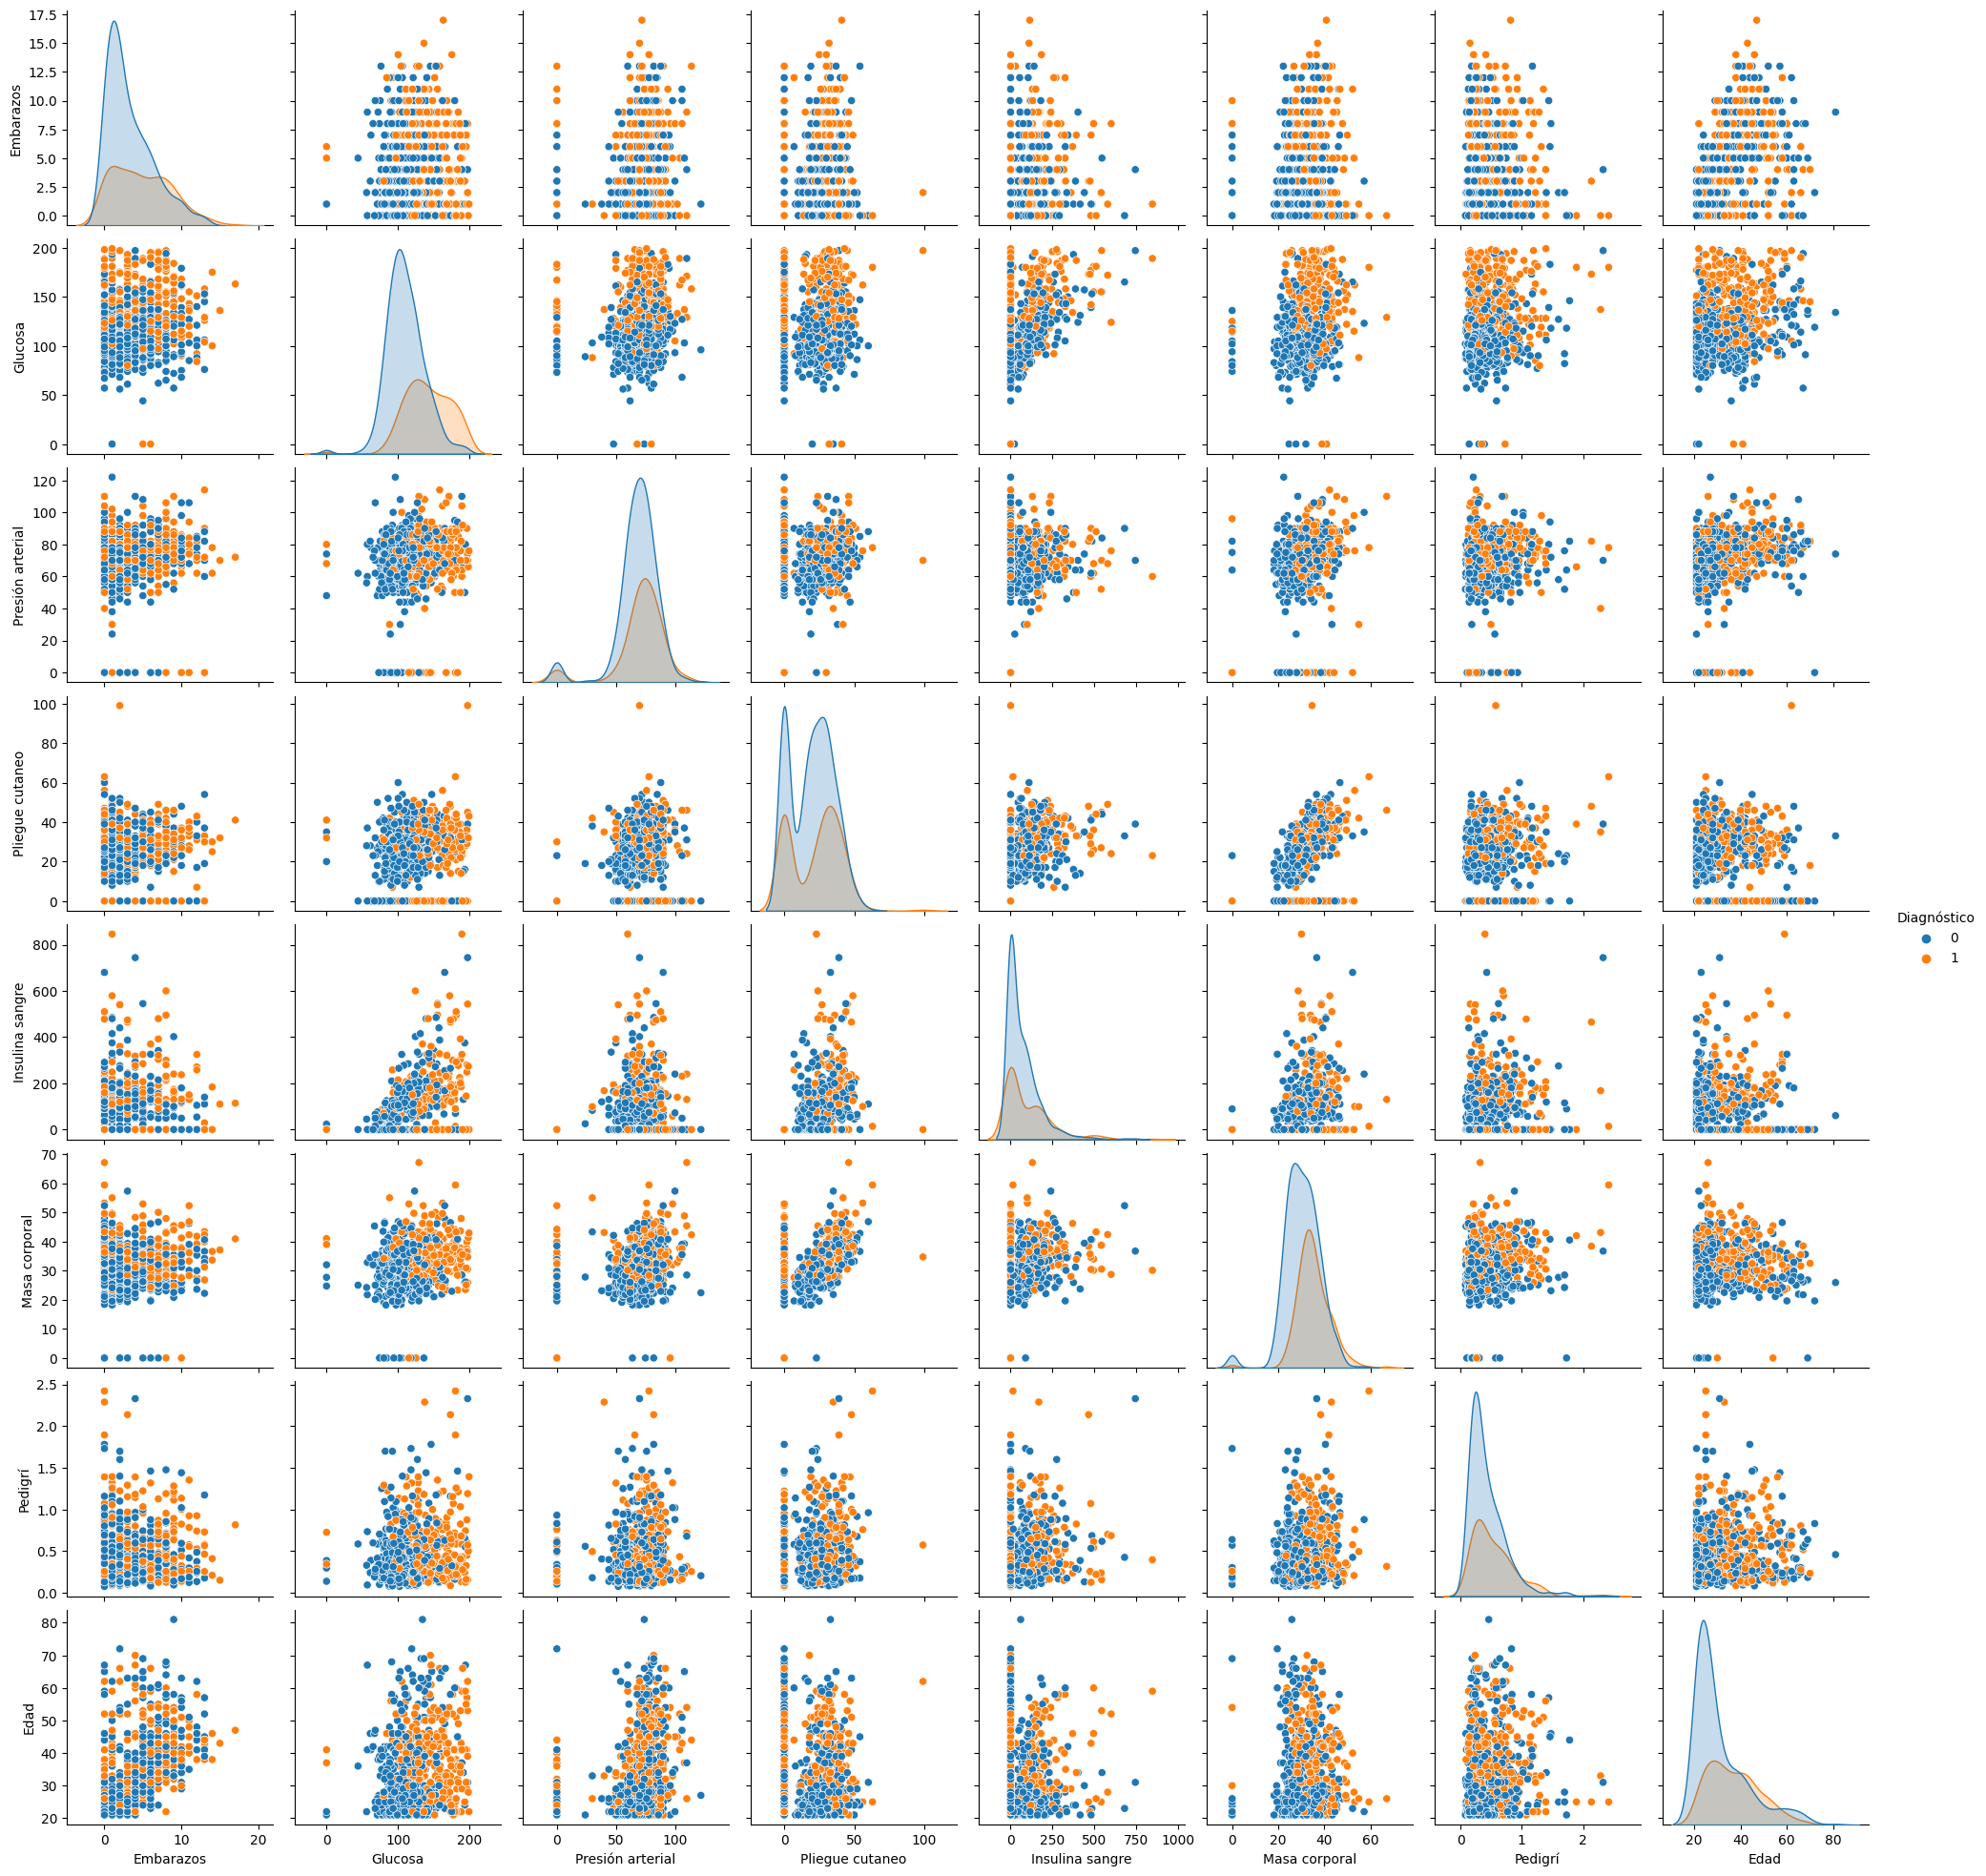

In [21]:
sns.pairplot(data=df, hue='Diagnóstico')

<Axes: >

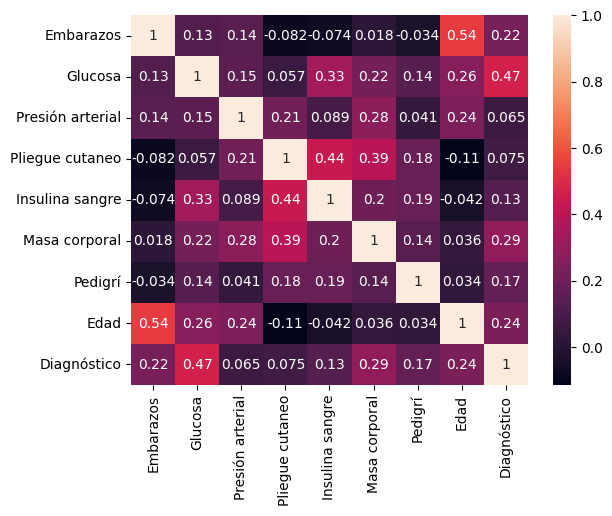

In [22]:
sns.heatmap(df.corr(), annot=True)

### Conclusiones
* Parece que algunas columnas tienen valores nulos que estan como 0, convendria transformarlos en nulos para imputarlos
* Tambien tenemos algunos valores extremos en Insulina sangre, pedigrí y pliegue cutaneo

## Limpieza

#### Remplazar los 0 por nulos

In [23]:
columnas = ['Glucosa', 'Presión arterial', 'Pliegue cutaneo', 'Insulina sangre', 'Masa corporal']
df[columnas] = df[columnas].replace(0, float('nan'))

In [24]:
df.isnull().sum()

Embarazos             0
Glucosa               5
Presión arterial     35
Pliegue cutaneo     227
Insulina sangre     374
Masa corporal        11
Pedigrí               0
Edad                  0
Diagnóstico           0
dtype: int64

#### Remplazar los valores extremos

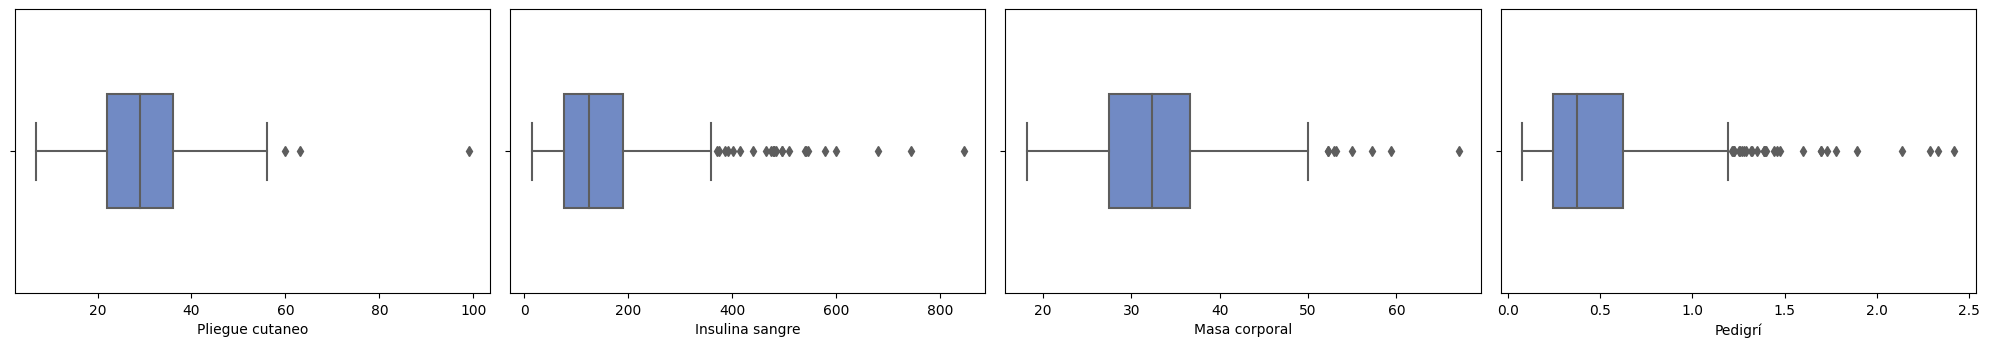

In [25]:
box_df = ['Pliegue cutaneo', 'Insulina sangre', 'Masa corporal', 'Pedigrí']

plt.figure(figsize=(20, 10), dpi=100)

for i, columna in enumerate(box_df, start=1):
    plt.subplot(3, 4, i)
    
    sns.boxplot(data=df, x=columna, width=0.4, palette=uni_colores)
    
    plt.tight_layout()

In [26]:
sup_pliegue = 59
inf_pliegue = 10

sup_insul = 350
inf_insul = 0

sup_mas = 50
inf_mas = 10

sup_ped = 1.2
inf_ped = 0.0

In [27]:
df['Pliegue cutaneo'] = df['Pliegue cutaneo'].clip(lower=inf_pliegue, upper=sup_pliegue)
df['Insulina sangre'] = df['Insulina sangre'].clip(lower=inf_insul, upper=sup_insul)
df['Masa corporal'] = df['Masa corporal'].clip(lower=inf_mas, upper=sup_mas)
df['Pedigrí'] = df['Pedigrí'].clip(lower=inf_ped, upper=sup_ped)

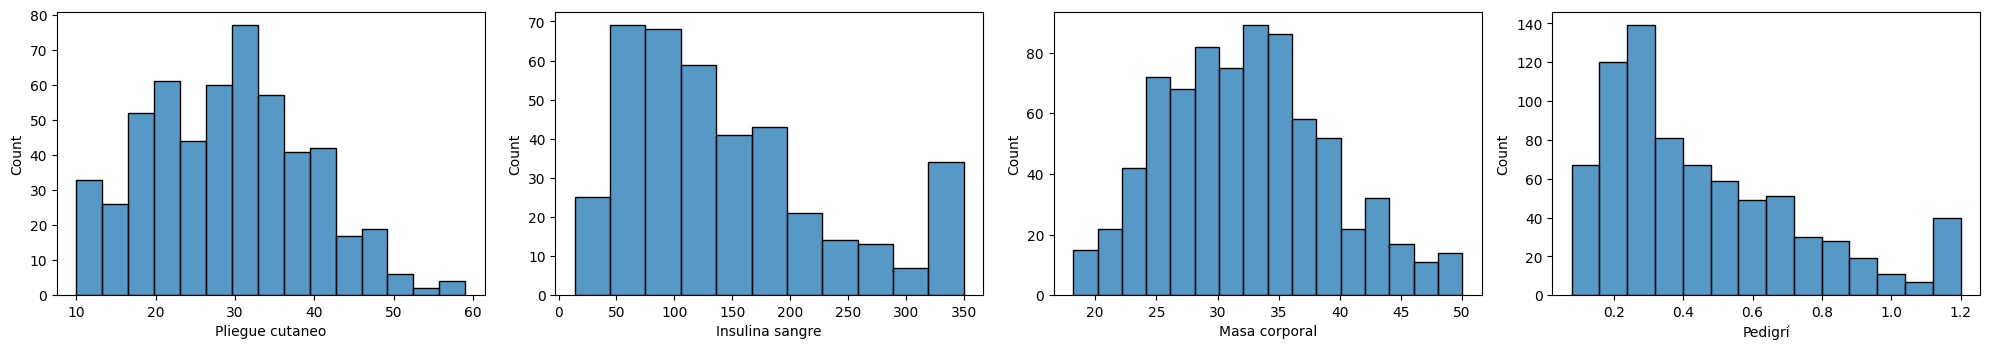

In [28]:
df_hist = ['Pliegue cutaneo', 'Insulina sangre', 'Masa corporal', 'Pedigrí']
           
plt.figure(figsize=(20, 10), dpi=100)

for i, columna in enumerate(df_hist, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=columna)
           
    plt.tight_layout()

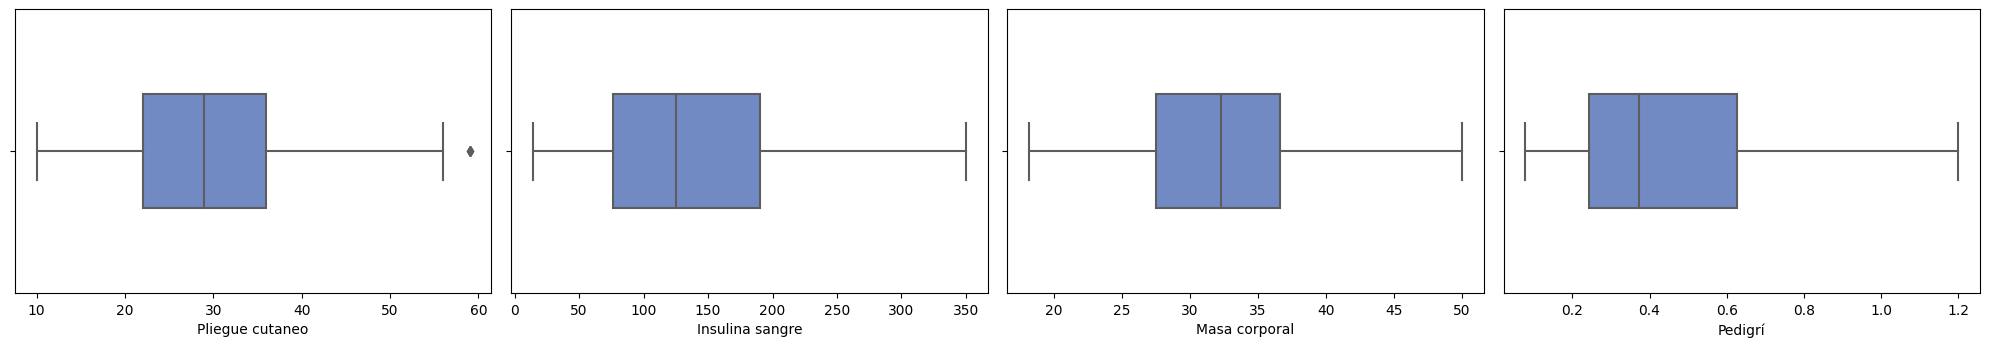

In [29]:
box_df = ['Pliegue cutaneo', 'Insulina sangre', 'Masa corporal', 'Pedigrí']

plt.figure(figsize=(20, 10), dpi=100)

for i, columna in enumerate(box_df, start=1):
    plt.subplot(3, 4, i)
    
    sns.boxplot(data=df, x=columna, width=0.4, palette=uni_colores)
    
    plt.tight_layout()

# 3.- Division del dataset

In [30]:
x = df.drop('Diagnóstico', axis=1)
y = df['Diagnóstico']

In [31]:
x.shape

(768, 8)

# 4.- Preprocesamiento

In [32]:
df.head()

,Embarazos,Glucosa,Presión arterial,Pliegue cutaneo,Insulina sangre,Masa corporal,Pedigrí,Edad,Diagnóstico
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,1.200,33,1


In [33]:
df.isnull().sum()

Embarazos             0
Glucosa               5
Presión arterial     35
Pliegue cutaneo     227
Insulina sangre     374
Masa corporal        11
Pedigrí               0
Edad                  0
Diagnóstico           0
dtype: int64

### Creacion del pipeline

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('imputer', SimpleImputer(strategy='mean'))
])

In [35]:
x_prep = pipeline.fit_transform(x)

In [36]:
x_prep = pd.DataFrame(x_prep, columns=x.columns, index=x.index)

In [37]:
x_prep.head()

,Embarazos,Glucosa,Presión arterial,Pliegue cutaneo,Insulina sangre,Masa corporal,Pedigrí,Edad
0,0.6,0.738095,0.000,0.428571,0.183098,0.142857,0.665359,1.235294
1,-0.4,-0.761905,-0.375,0.000000,0.183098,-0.626374,-0.056209,0.117647
2,1.0,1.571429,-0.500,0.006337,0.183098,-0.989011,0.783007,0.176471
3,-0.4,-0.666667,-0.375,-0.428571,-0.272527,-0.461538,-0.537255,-0.470588
4,-0.6,0.476190,-2.000,0.428571,0.378022,1.186813,2.163399,0.235294


# 5.- Seleccion de caracteristicas

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

rf_model.fit(x_prep, y)

RandomForestClassifier()

In [39]:
impor_df = pd.DataFrame({'Columna': x_prep.columns, 'Importancia': rf_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

In [40]:
impor_df

,Columna,Importancia
1,Glucosa,0.255576
5,Masa corporal,0.162247
7,Edad,0.134421
6,Pedigrí,0.121129
4,Insulina sangre,0.088400
2,Presión arterial,0.086893
0,Embarazos,0.077208
3,Pliegue cutaneo,0.074126


<Axes: xlabel='Importancia', ylabel='Columna'>

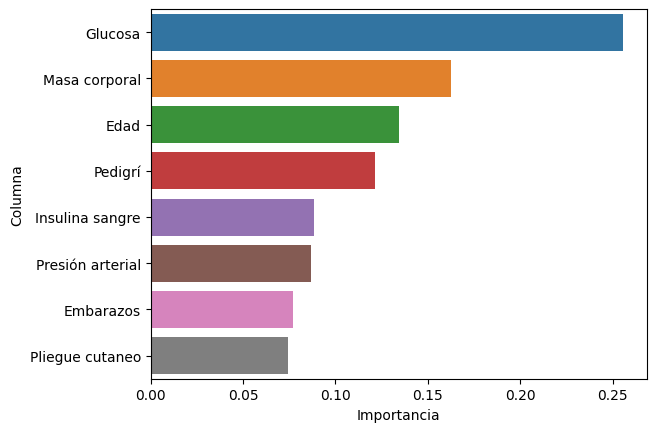

In [41]:
sns.barplot(data=impor_df, y='Columna', x='Importancia')

# 6.- Entrenamiento y ajuste

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

modelos = [
    ('Logistic Regression', LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    ('Decision Tree Classifier', DecisionTreeClassifier(), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}),
    ('Random Forest Classifier', RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    ('Gaussian Naive Bayes', GaussianNB(), {}),
    ('SVM', SVC(), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'poly', 'rbf']}) 
]


In [43]:
score_col = []
mejor_parametro_col = []
modelo_col = []

In [44]:
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, GridSearchCV

for nombre, modelo, parametros in modelos:
    grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=KFold(n_splits=5))
    
    grid_search.fit(x_prep, y)
    
    mejor_parametro_col.append(grid_search.best_params_)
    score_col.append(grid_search.best_score_)
    modelo_col.append(nombre)

# 7.- Evaluación

In [45]:
resultado_df = pd.DataFrame({
    'modelo': modelo_col,
    'score_accuracy': score_col,
    'parametro': mejor_parametro_col,
})

In [46]:
resultado_df.head()

,modelo,score_accuracy,parametro
0,Logistic Regression,0.770894,{'C': 10.0}
1,Decision Tree Classifier,0.743570,"{'max_depth': 5, 'min_samples_split': 10}"
2,Random Forest Classifier,0.765691,"{'max_depth': 10, 'n_estimators': 100}"
3,Gaussian Naive Bayes,0.743562,{}
4,SVM,0.766989,"{'C': 10.0, 'kernel': 'linear'}"


<Axes: xlabel='score_accuracy', ylabel='modelo'>

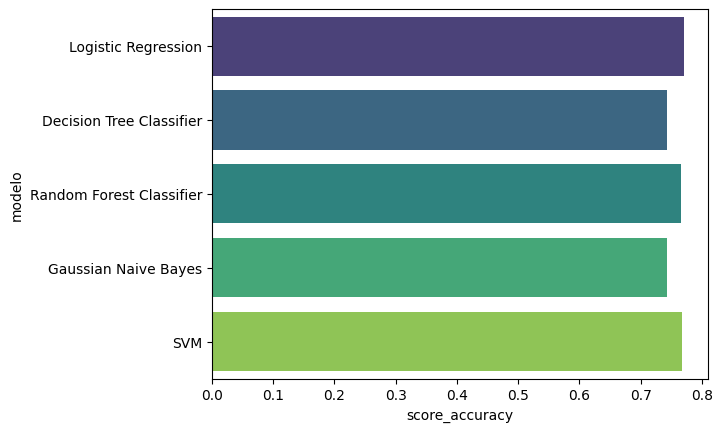

In [47]:
sns.barplot(data=resultado_df, x='score_accuracy', y='modelo', palette='viridis')

In [48]:
grid_search.best_estimator_

SVC(C=10.0, kernel='linear')

#### Entrenamiento final

In [49]:
best_model = grid_search.best_estimator_

# Entrenamiento final con todos los datos disponibles
best_model.fit(x_prep, y)

SVC(C=10.0, kernel='linear')